<a href="https://colab.research.google.com/github/kotani/kotani_che/blob/master/ECG_png_V5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://qiita.com/coticoticotty/items/5fe4a7f3c740523eb2fb

In [ ]:
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [ ]:
from google.colab import drive

In [ ]:
import torch
from torch import tensor
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import torch
import torchvision
from torchvision import transforms


In [ ]:
image_size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)


In [ ]:
import pathlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from PIL import Image, ImageOps

In [ ]:
pwd = pathlib.Path().resolve()

In [ ]:
data_path =  pwd/"drive/MyDrive/PYTORCH_data"
train_image_dir = data_path/"train"
val_image_dir = data_path/"val"


In [ ]:
data_transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(
            image_size, scale=(0.5, 1.0)
        ),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=[-15, 15]),
        transforms.ToTensor(),
        transforms.Normalize(mean, std),
        transforms.RandomErasing(0.5),
    ]),
    'val': transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])
}

In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root=train_image_dir, transform=data_transform['train'])
val_dataset = torchvision.datasets.ImageFolder(root=val_image_dir, transform=data_transform['val'])


In [ ]:
batch_size = 5
train_dataLoader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)
val_dataLoader = torch.utils.data.DataLoader(
    val_dataset, batch_size=batch_size, shuffle=False
)

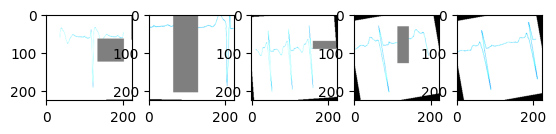

In [ ]:
for i in range(5):
  ax = plt.subplot(1,5,i+1)
  image, label = train_dataset[i]
  img = (np.transpose(image.numpy(),(1,2,0)) + 1) /2
  plt.imshow(img)
plt.show()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# ファインチューニング版

# 学習済みモデルの読み込み
# vgg19_bnをパラメータ付きで読み込む
from torchvision import models
net = models.vgg19_bn(pretrained = True)

# 乱数初期化
#torch_seed()

# 最終ノードの出力を2に変更する
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

# AdaptiveAvgPool2d関数の取り外し
net.avgpool = nn.Identity()

# GPUの利用
net = net.to(device)

# 学習率
lr = 0.001

# 損失関数定義
criterion = nn.CrossEntropyLoss()

# 最適化関数定義
optimizer = optim.SGD(net.parameters(),lr=lr,momentum=0.9)

# historyファイルも同時に初期化する
history = np.zeros((0, 5))

In [ ]:
# 共通関数のダウンロード
!git clone https://github.com/makaishi2/pythonlibs.git

# 共通関数のロード
from pythonlibs.torch_lib1 import *

# 共通関数の存在チェック
print(README)

Cloning into 'pythonlibs'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 112 (delta 0), reused 2 (delta 0), pack-reused 108
Receiving objects: 100% (112/112), 21.12 MiB | 39.39 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Common Library for PyTorch
Author: M. Akaishi


In [ ]:
# 学習
num_epochs = 5
history = fit(net, optimizer, criterion, num_epochs, 
          train_dataLoader, val_dataLoader, device, history)

  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [1/5], loss: 0.68257 acc: 0.73494 val_loss: 0.72602, val_acc: 0.40476


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [2/5], loss: 0.53801 acc: 0.74699 val_loss: 0.44412, val_acc: 0.76190


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [3/5], loss: 0.50374 acc: 0.78313 val_loss: 0.33995, val_acc: 0.90476


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [4/5], loss: 0.39298 acc: 0.84337 val_loss: 0.28857, val_acc: 0.88095


  0%|          | 0/17 [00:00<?, ?it/s]

Epoch [5/5], loss: 0.38891 acc: 0.83133 val_loss: 0.38732, val_acc: 0.83333


初期状態: 損失: 0.72602 精度: 0.40476
最終状態: 損失: 0.38732 精度: 0.83333


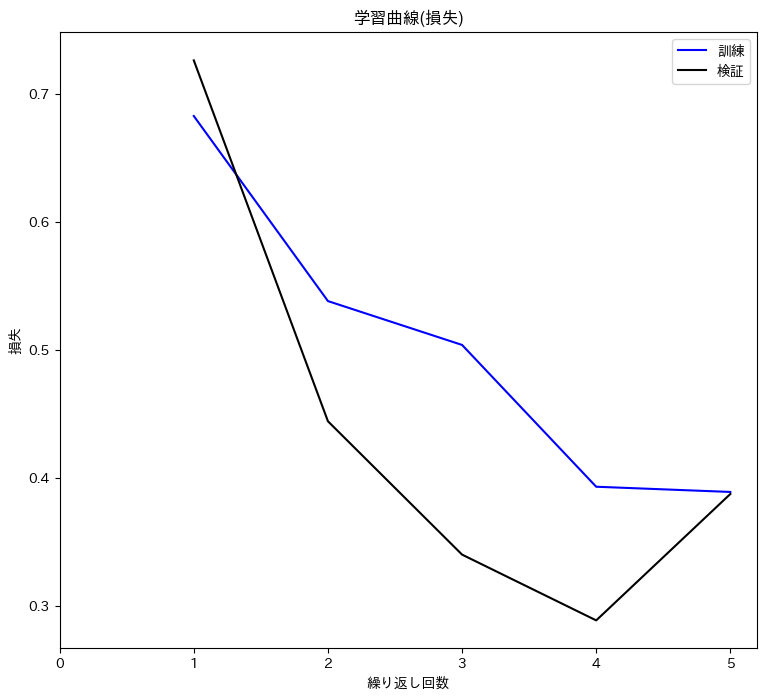

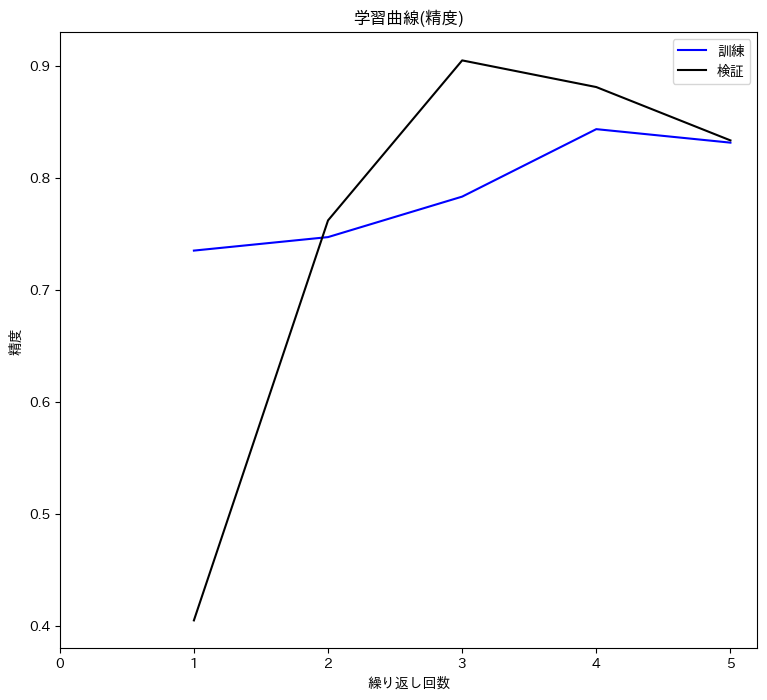

In [ ]:
evaluate_history(history)